# **1. Theoretical Exercises on Recurrent Neural Network (RNN)**

As we learnt in previous lecture, we saw feedforward artificial neural networks, which do not contain any cycles and for which the nodes do not maintain a persistent state over several runs. This exercise considers artificial neural networks with nodes that maintain a persistent state that can be updated. This kind of neural network is called a recurrent
neural networks (RNN). As an example, consider the following RNN with

$y_t=W_{x_t}+V_{s_t}$

$s_{t+1}=y_t$

from some initial state $s_0$, where t denotes the $t$-th call of the RNN, i.e., $x_t$ is the $t$-th input.

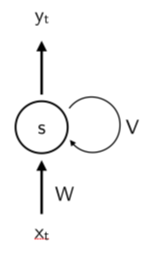

Figure 1

Questions:

1. What is the recurrent state in the RNN from Figure 1? Name one example that can be more naturally modelled with RNNs than with feedforward neural networks?

> **Solution:** The recurrent state is denoted s. In this case it conincides with the output. Reccurent models are used to model data with temporal structure, e.g. speech recognition, machine translation.

2. As the state of an RNN changes over different runs of the RNN, the loss functions that we use for feedforward neural networks do not yield consistent results. For given dataset X, please propose a loss function (based on the mean square loss function) for RNNs and justify why you chose this loss function. 

> **Solution:** We have a data $X={(x_t,y_t)}$, where we assume that the data is ordered temporally. Thus, we define the loss function to be $L(V,W,s_0 )=\sum_{t=1}^T[(y(t)-f(x_t,s_{t-1}(V,W),V,W))^2/T]$, where $s_{t-1}$ is the previous recurrent state. The initial state $s_0$ needs to be specified and the problem depends on it as well. 

3. For a dataset $X≔(x_t,y_t)_1^k$ (for some $k\in N$), show how information is propagated by drawing a feedforward neural network that corresponds to the RNN from Figure 1 for $k=3$. Recall that a feedforward neural network does not contain nodes with a persistent state. (Hint: unfold the RNN.)

> **Solution:**

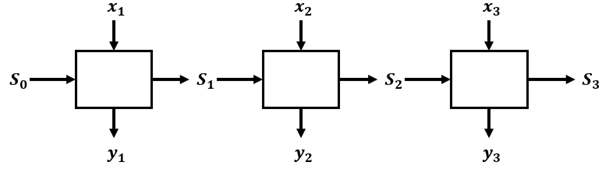


# **2. Using Recurrent Neural Network (RNN) to Solve a Problem**

The task of this exercise is to implement RNN algorithm on a stack price
prediction.

To comply with this goal the **Google Stock Price** dataset is used, a very common dataset for data scientists for tests and studies in **ML** (Machine Learning).


**Load Data from your Google Drive**

In [ ]:
#"""
from google.colab import drive
drive.mount('/content/drive')
#"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

Enter the folder including csv files.

In [ ]:
cd drive/MyDrive/Teaching/CS5062/Practical/Practical_7

In [ ]:
ls

 datasets_20469_26460_Google_Stock_Price_Test.csv
 datasets_20469_26460_Google_Stock_Price_Train.csv
 Google_Stock_Price_Test.csv
 Google_Stock_Price_Train.csv
'Practical 7 – Recurrent Neural Network.ipynb'
'Practical 7 – Recurrent Neural Network(Solutions).ipynb'


#**Part 1 - Data Preprocessing**

First, we import required libraries, **numpy**, **matplotlib.pyplot**, and **pandas**.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

Import the training dataset. Hint: use **read_csv** from Pandas library. 

In [ ]:
# Put your codes here
dataset_train = pd.read_csv('datasets_20469_26460_Google_Stock_Price_Train.csv')

Show the training dataset by using **head** method.

In [ ]:
# Put your codes here
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Get the column of "open" price and print it and its shape.

In [ ]:
# Put your codes here
training_set = dataset_train.iloc[:,1:2].values

Please features with using **MinMaxScaler** method

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Put your codes here
sc = MinMaxScaler(feature_range= (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Please create a data structure with 60 timesteps and 1 output. Giving features to X_train and labels to y_train

In [ ]:
X_train = []
y_train = []
# Put your codes here
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshape X_train into 3D with (numberOfExamples, timeSteps, numberOfFeatures)

In [ ]:
# Put your codes here
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

#**Part 2 - Building the RNN stacked lstm with dropout regularization to prevent overfitting**

Here, we import keras library and packages from tensorflow to implement RNN in a simple way.

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Initialising the RNN

In [ ]:
# Put your codes here
regressor = Sequential()

Adding the first the LSTM layers with 50 neuro units, dropout regularisation with 0.2, and return_sequences as True.

In [ ]:
# Put your codes here
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

Adding the first the LSTM layers with 50 neuro units, dropout regularisation with 0.2, and return_sequences as True.

In [ ]:
# Put your codes here
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

Adding a third  the LSTM layers with 50 neuro units, dropout regularisation with 0.2, and return_sequences as default.

In [ ]:
# Put your codes here
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

 Adding regressor layer as output layer.

In [ ]:
# Put your codes here
regressor.add(Dense(units=1))


Compile the RNN with optimizer as Adam and loss as mean_squared_error.

In [ ]:
# Put your codes here
regressor.compile(optimizer='adam', loss='mean_squared_error')

# **Part 3 - Training RNN with training data, making the predictions, and visualising the results**

Train the RNN on the training set. Hint: using **fit** method.

In [ ]:
import tensorflow as tf 
tf.random.set_seed(1234)
# Put your codes here
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0015
Epoch 2/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0014
Epoch 3/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0014
Epoch 4/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0015
Epoch 5/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0015
Epoch 6/20
38/38 [==============================] - 2s 43ms/step - loss: 0.0014
Epoch 7/20
38/38 [==============================] - 2s 43ms/step - loss: 0.0016
Epoch 8/20
38/38 [==============================] - 2s 43ms/step - loss: 0.0014
Epoch 9/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0015
Epoch 10/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0013
Epoch 11/20
38/38 [==============================] - 2s 43ms/step - loss: 0.0014
Epoch 12/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0014
Epoch 13/20
38/38 [==================

Loading the test dataset

In [ ]:
dataset_train = pd.read_csv('datasets_20469_26460_Google_Stock_Price_Train.csv')
dataset_test = pd.read_csv('datasets_20469_26460_Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

Concatenate the "Open" columns of dataset_train and datadataset_test. The concatenated data are defined as "dataset_total". Then, print the shape after conducting concat. 

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
print(dataset_total.shape)

(1278,)


Get the inputs of testing data.

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)

Put all inputs of data in "X_test"

In [ ]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)


Reshape X_test into 3D with (numberOfExamples, timeSteps, numberOfFeatures)

In [ ]:
# Put your codes here
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

Getting the predicted stock price and print the predicted stock price. Hint: using **predict** method.

In [ ]:
# Put your codes here
predicted_stock_price=regressor.predict(X_test)
print(predicted_stock_price)

[[0.9515996 ]
 [0.9456875 ]
 [0.94564533]
 [0.9485567 ]
 [0.95575166]
 [0.96798265]
 [0.9794284 ]
 [0.9844568 ]
 [0.98491037]
 [0.9835985 ]
 [0.9824283 ]
 [0.98174065]
 [0.9815168 ]
 [0.98262   ]
 [0.9844445 ]
 [0.99311197]
 [1.0067273 ]
 [1.0219111 ]
 [1.0306808 ]
 [1.0229125 ]]


During the data-processing, we did the normalisation and make range within 0 and 1. Now, we need to inverse the predictions to orginal scale.

Hint: using **inverse_transform** method from **MinMaxScaler**.

In [ ]:
# Put your codes here
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[790.66187]
 [787.48376]
 [787.46106]
 [789.0262 ]
 [792.89386]
 [799.46875]
 [805.6215 ]
 [808.3246 ]
 [808.5684 ]
 [807.86316]
 [807.23413]
 [806.8645 ]
 [806.74414]
 [807.33716]
 [808.31793]
 [812.97723]
 [820.2963 ]
 [828.45856]
 [833.1727 ]
 [828.9968 ]]


For the visualization, plot predicted stock price by red line and real stock price by blue to see the gap between them.

Hint: using **matplotlib.pyplot (plt)*** method.

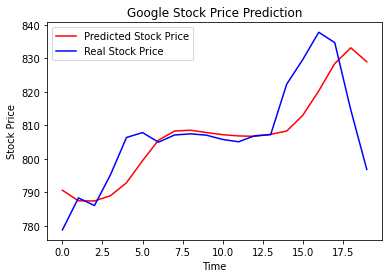

In [ ]:
# Put your codes here
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()